In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
# mounting google drive
import os.path
from google.colab import drive

# mount Google Drive to /content/drive/My Drive/
if os.path.isdir("/content/drive/My Drive"):
  print("Google Drive already mounted")
else:
  drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load Data
base_path = '/content/drive/My Drive/cs972/MachineLearning/'
data1_train = pd.read_csv(base_path+'Data_1/train.txt')
data1_validation = pd.read_csv(base_path + 'Data_1/test.txt')
data1_test = pd.read_csv(base_path + 'Data_1/predict.txt')

data2_train = pd.read_excel(base_path+'Data_2/train.xlsx')
data2_validation = pd.read_excel(base_path + 'Data_2/test.xlsx')
data2_test = pd.read_excel(base_path + 'Data_2/predict.xlsx')


## investigating the data

In [9]:
data1_train.head(7)

,flood_dependent,look_aspec,look_dem,look_plan,look_slope,look_soil,look_river,look_landu,Look_geolo,rain_look
0,0,0.100000,0.009999,0.27,0.100000,0.119999,0.050000,0.109999,0.090000,0.300000
1,0,0.059999,0.109999,0.27,0.129999,0.119999,0.100000,0.109999,0.090000,0.259999
2,0,0.100000,0.109999,0.27,0.100000,0.119999,0.280000,0.109999,0.100000,0.270000
3,0,0.100000,0.189999,0.25,0.100000,0.150000,0.050000,0.180000,0.349999,0.159999
4,0,0.100000,0.009999,0.25,0.100000,0.119999,0.280000,0.109999,0.100000,0.259999
5,0,0.059999,0.109999,0.27,0.129999,0.119999,0.050000,0.070000,0.090000,0.159999
6,0,0.129999,0.009999,0.27,0.100000,0.119999,0.159999,0.109999,0.090000,0.259999


In [10]:
data1_train.describe()

,flood_dependent,look_aspec,look_dem,look_plan,look_slope,look_soil,look_river,look_landu,Look_geolo,rain_look
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.500000,0.100346,0.204950,0.289158,0.197525,0.164752,0.181039,0.139405,0.227128,0.253217
std,0.501242,0.024299,0.161487,0.075724,0.123429,0.078317,0.135270,0.047877,0.132231,0.053505
min,0.000000,0.059999,0.009999,0.250000,0.100000,0.019999,0.050000,0.070000,0.090000,0.159999
25%,0.000000,0.090000,0.109999,0.250000,0.100000,0.119999,0.050000,0.109999,0.090000,0.259999
50%,0.500000,0.100000,0.189999,0.270000,0.129999,0.119999,0.159999,0.109999,0.349999,0.259999
75%,1.000000,0.119999,0.230000,0.270000,0.270000,0.150000,0.280000,0.180000,0.349999,0.300000
max,1.000000,0.180000,0.460000,0.479999,0.400000,0.400000,0.419999,0.379999,0.460000,0.300000


In [11]:
data1_train.groupby('flood_dependent').count()

,look_aspec,look_dem,look_plan,look_slope,look_soil,look_river,look_landu,Look_geolo,rain_look
flood_dependent,,,,,,,,,
0,101,101,101,101,101,101,101,101,101
1,101,101,101,101,101,101,101,101,101


In [12]:
data2_train.head(7)

,flood_dependent,look_dem,look_plan,look_slope,look_river,look_landu,look_geolo,look_rain,river_dens,look_spi,look_twi
0,1,0.63,0.43,0.02,0.59,0.15,0.15,0.40,0.06,0.32,0.08
1,1,0.63,0.43,0.11,0.59,0.15,0.15,0.40,0.20,0.32,0.00
2,1,0.63,0.46,0.11,0.59,0.15,0.15,0.40,0.20,0.32,0.01
3,1,0.63,0.46,0.18,0.59,0.15,0.15,0.40,0.37,0.29,0.01
4,1,0.13,0.46,0.22,0.59,0.15,0.07,0.18,0.20,0.29,0.01
5,1,0.13,0.46,0.02,0.22,0.15,0.07,0.13,0.06,0.32,0.01
6,1,0.13,0.43,0.05,0.59,0.15,0.07,0.13,0.06,0.32,0.01


In [13]:
data2_train.describe()

,flood_dependent,look_dem,look_plan,look_slope,look_river,look_landu,look_geolo,look_rain,river_dens,look_spi,look_twi
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.50000,0.166788,0.370066,0.066026,0.221060,0.148775,0.129338,0.214868,0.088543,0.304073,0.037252
std,0.50083,0.233895,0.141047,0.075975,0.258172,0.078335,0.071302,0.125961,0.112957,0.042851,0.031413
min,0.00000,0.010000,0.110000,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.030000,0.000000
25%,0.00000,0.010000,0.430000,0.020000,0.000000,0.150000,0.070000,0.120000,0.000000,0.320000,0.010000
50%,0.50000,0.060000,0.430000,0.020000,0.050000,0.150000,0.070000,0.130000,0.060000,0.320000,0.040000
75%,1.00000,0.130000,0.460000,0.110000,0.590000,0.150000,0.210000,0.400000,0.200000,0.320000,0.070000
max,1.00000,0.630000,0.460000,0.400000,0.590000,0.750000,0.310000,0.400000,0.370000,0.320000,0.080000


In [15]:
data2_train.groupby('flood_dependent').count()

,look_dem,look_plan,look_slope,look_river,look_landu,look_geolo,look_rain,river_dens,look_spi,look_twi
flood_dependent,,,,,,,,,,
0,151,151,151,151,151,151,151,151,151,151
1,151,151,151,151,151,151,151,151,151,151


-----------------

### some preparing

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score,roc_curve,auc

def plot_roc(label, predicted,y):
  fpr, tpr, threshold = roc_curve(y, predicted)
  roc_auc = auc(fpr, tpr)
  plt.title(label+' Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [0]:
def show_model_metrics(model_name,label,predicted,y):
  print('%s model for %s:'%(model_name,label))
  print('accuracy: %f precision: %f f1_score: %f'%(accuracy_score(data1_val_y, data1_val_pred),precision_score(data1_val_y, data1_val_pred),f1_score(data1_val_y, data1_val_pred)))
  plot_roc(label,predicted,y)


In [0]:
data1_train_X=data1_train.drop('flood_dependent',axis = 1);
data1_train_y=data1_train.flood_dependent

data1_val_X=data1_validation.drop('flood_dependent',axis = 1);
data1_val_y=data1_validation.flood_dependent


data2_train_X=data2_train.drop('flood_dependent',axis = 1);
data2_train_y=data2_train.flood_dependent

data2_val_X=data2_validation.drop('flood_dependent',axis = 1);
data2_val_y=data2_validation.flood_dependent


## classifying using MLP classifier:

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
#trying default configs
data1_MLP_model = MLPClassifier(random_state = 7)
data2_MLP_model = MLPClassifier(random_state = 7)

In [40]:
data1_MLP_model.fit(data1_train_X, data1_train_y)
data1_val_pred = data1_MLP_model.predict(data1_val_X)

data2_MLP_model.fit(data2_train_X, data2_train_y)
data2_val_pred = data2_MLP_model.predict(data2_val_X)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP model for Data1:
accuracy: 0.930233 precision: 0.913043 f1_score: 0.933333


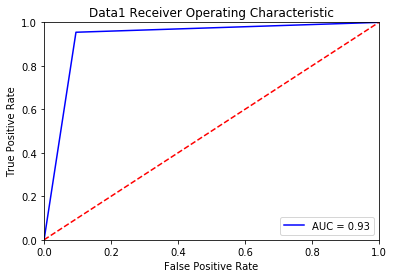

MLP model for Data2:
accuracy: 0.930233 precision: 0.913043 f1_score: 0.933333


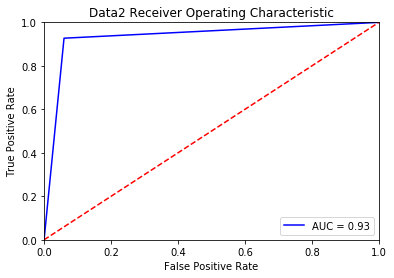

In [41]:
show_model_metrics('MLP','Data1',data1_val_pred,data1_val_y);
show_model_metrics('MLP','Data2',data2_val_pred,data2_val_y);


In [0]:
# adjust config values
data1_MLP_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam',  random_state=7,tol=0.000000001)

data2_MLP_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam',  random_state=7,tol=0.000000001)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP model for Data1:
accuracy: 0.988372 precision: 1.000000 f1_score: 0.988506


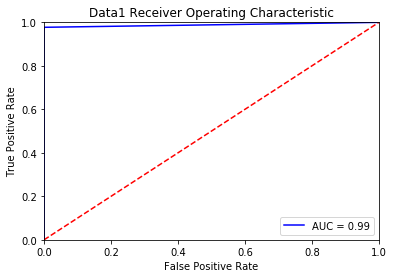

MLP model for Data2:
accuracy: 0.988372 precision: 1.000000 f1_score: 0.988506


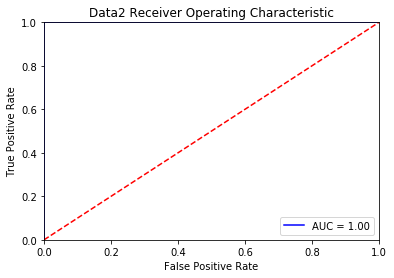

In [43]:
data1_MLP_model.fit(data1_train_X, data1_train_y)
data1_val_pred = data1_MLP_model.predict(data1_val_X)

data2_MLP_model.fit(data2_train_X, data2_train_y)
data2_val_pred = data2_MLP_model.predict(data2_val_X)

show_model_metrics('MLP','Data1',data1_val_pred,data1_val_y);
show_model_metrics('MLP','Data2',data2_val_pred,data2_val_y);

## classifying using RandomForest classifier:

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
data1_randomForest_model = RandomForestClassifier(random_state=7,max_depth=3)

data2_randomForest_model = RandomForestClassifier(random_state=7,max_depth=3)

In [32]:
data1_randomForest_model.fit(data1_train_X, data1_train_y)
data2_randomForest_model.fit(data2_train_X, data2_train_y)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

RandomForest model for Data1:
accuracy: 0.941860 precision: 0.914894 f1_score: 0.945055


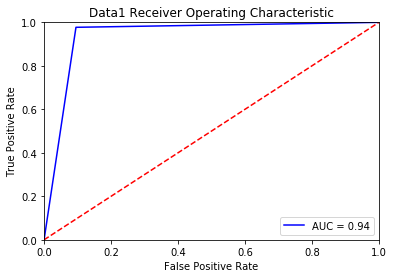

RandomForest model for Data2:
accuracy: 0.941860 precision: 0.914894 f1_score: 0.945055


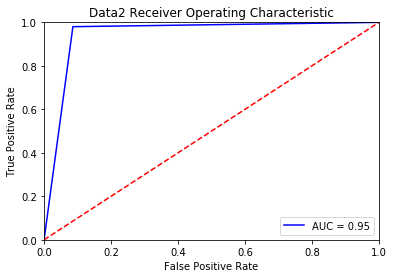

In [33]:
data1_val_pred=data1_randomForest_model.predict(data1_val_X)
data2_val_pred=data2_randomForest_model.predict(data2_val_X)

show_model_metrics('RandomForest','Data1',data1_val_pred,data1_val_y);
show_model_metrics('RandomForest','Data2',data2_val_pred,data2_val_y);


## classifying using ELM classifier:

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

class ELM(object):
    
  def __init__(self, input_layer = 'relu', hidden_layer = ['relu'], output_layer = 'relu'):
    self.input_layer = input_layer
    self.hidden_layer = hidden_layer
    self.output_layer = output_layer
    self.model = None

  def buildNetwork(self):
    pass

  def setWeights(self):
    weights = self.model.layers[-1].get_weights()
    weights[0] = np.random.random_sample((weights[0].shape[0],weights[0].shape[1]))
    self.model.layers[-1].set_weights(weights)

  def fit(self, X_train, y_train):
    self.model.fit(X_train, y_train, verbose=0, batch_size=5, epochs=100)
    
  def predict(self, X_train):
    return self.model.predict(X_train,verbose=0, batch_size=5)
    
  def evaluete(self, X_test, y_test):
    return self.model.evaluate(X_test, y_test)

  def getWeights(self):
    return self.model.get_weights()

  def summary(self):
    self.model.summary()

class MultiClassify(ELM):

  def buildNetwork(self, input_dim):
    self.model = Sequential()

    # Input layer
    self.model.add(Dense(units=100, activation=self.input_layer, input_dim=input_dim, trainable=False))
    self.setWeights()
    # Hidden layer
    for act in self.hidden_layer:
      self.model.add(Dense(units=10, activation=act, trainable=True))
    # Output layer
    self.model.add(Dense(units=3, activation=self.output_layer, trainable=True))

    self.model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
                metrics=['accuracy'])

class BinaryClassify(ELM):

  def buildNetwork(self, input_dim):
    self.model = Sequential()

    # Input layer
    self.model.add(Dense(units=110, activation=self.input_layer, input_dim=input_dim, trainable=False))
    self.setWeights()
    # Hidden layer
    for act in self.hidden_layer:
      self.model.add(Dense(units=10, activation=act, trainable=True))
    # Output layer
    self.model.add(Dense(units=2, activation=self.output_layer, trainable=True))

    self.model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


Using TensorFlow backend.


In [36]:
from sklearn.preprocessing import OneHotEncoder

# One Hot encode the class labels
data1_encoder = OneHotEncoder(sparse=False)
data2_encoder = OneHotEncoder(sparse=False)

data1_encoded_y = data1_encoder.fit_transform(np.array(data1_train_y).reshape(-1, 1))
data1_encoded_val_y = data1_encoder.transform(np.array(data1_val_y).reshape(-1, 1))

data2_encoded_y = data2_encoder.fit_transform(np.array(data2_train_y).reshape(-1, 1))
data2_encoded_val_y = data2_encoder.transform(np.array(data2_val_y).reshape(-1, 1))

# Create classify
data1_ELM_model = BinaryClassify(hidden_layer=['relu', 'linear', 'relu'], output_layer='sigmoid') 
data2_ELM_model = BinaryClassify(hidden_layer=['relu', 'linear', 'relu'], output_layer='sigmoid') 

data1_input_dim = data1_train_X.shape[1] # number of features
data1_ELM_model.buildNetwork(data1_input_dim)

data2_input_dim = data2_train_X.shape[1] # number of features
data2_ELM_model.buildNetwork(data2_input_dim)


data1_ELM_model.fit(data1_train_X, data1_encoded_y)
data2_ELM_model.fit(data2_train_X, data2_encoded_y)

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

Instructions for updating:
Use tf.cast instead.


ELM model for Data1:
accuracy: 0.930233 precision: 0.880000 f1_score: 0.936170


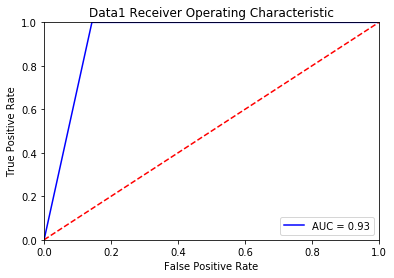

ELM model for Data2:
accuracy: 0.930233 precision: 0.880000 f1_score: 0.936170


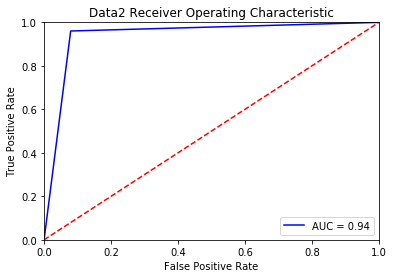

In [37]:
data1_val_pred=np.argmax(data1_ELM_model.predict(data1_val_X),axis=1)
show_model_metrics('ELM','Data1',data1_val_pred,data1_val_y)

data2_val_pred=np.argmax(data2_ELM_model.predict(data2_val_X),axis=1)
show_model_metrics('ELM','Data2',data2_val_pred,data2_val_y)

## classifying using C4.5 decisionTree classifier:

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [0]:
data1_Tree_model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4,random_state=7)
data1_Tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [0]:

# Train Decision Tree Classifer
data1_Tree_model = data1_Tree_model.fit(data1_train_X,data1_train_y)



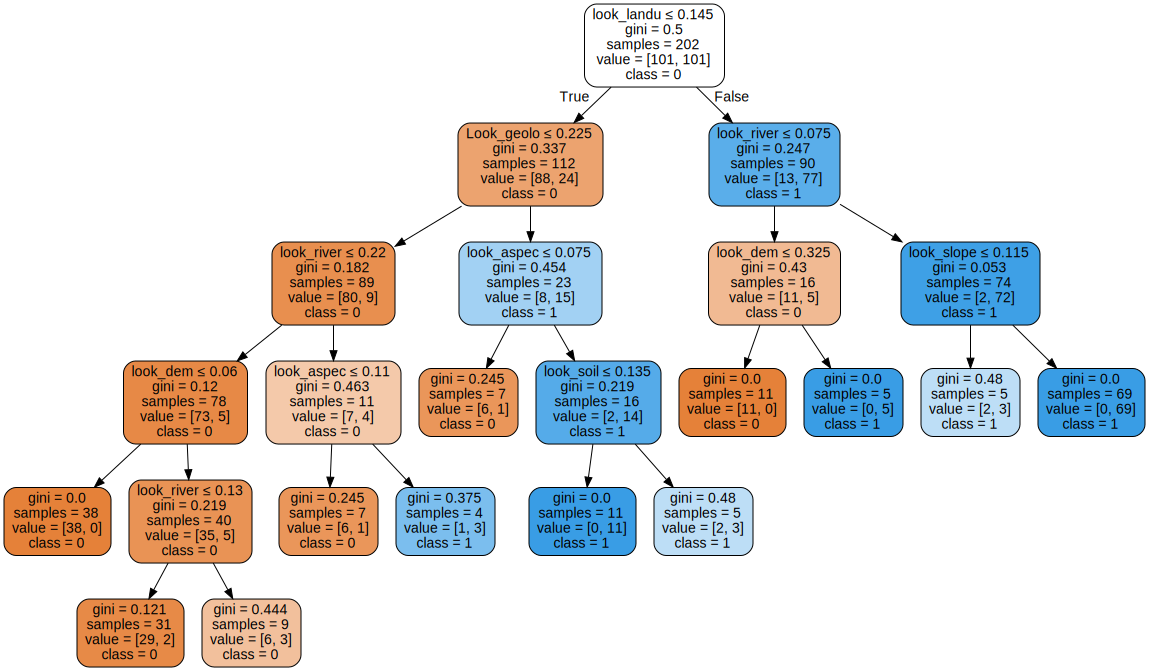

In [0]:
dot_data = tree.export_graphviz(data1_Tree_model, out_file=None,
                      feature_names=data1_train_X.columns,  
                      class_names=["0","1"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph  

Tree model for Data1:
accuracy: 0.906977 precision: 0.891304 f1_score: 0.911111


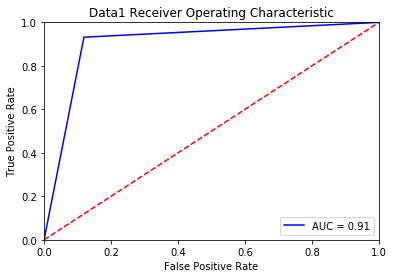

In [0]:
#Predict the response for test dataset
data1_val_pred = data1_Tree_model.predict(data1_val_X)

show_model_metrics('Tree','Data1',data1_val_pred,data1_val_y)

In [0]:
data2_Tree_model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4,random_state=7)
data2_Tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

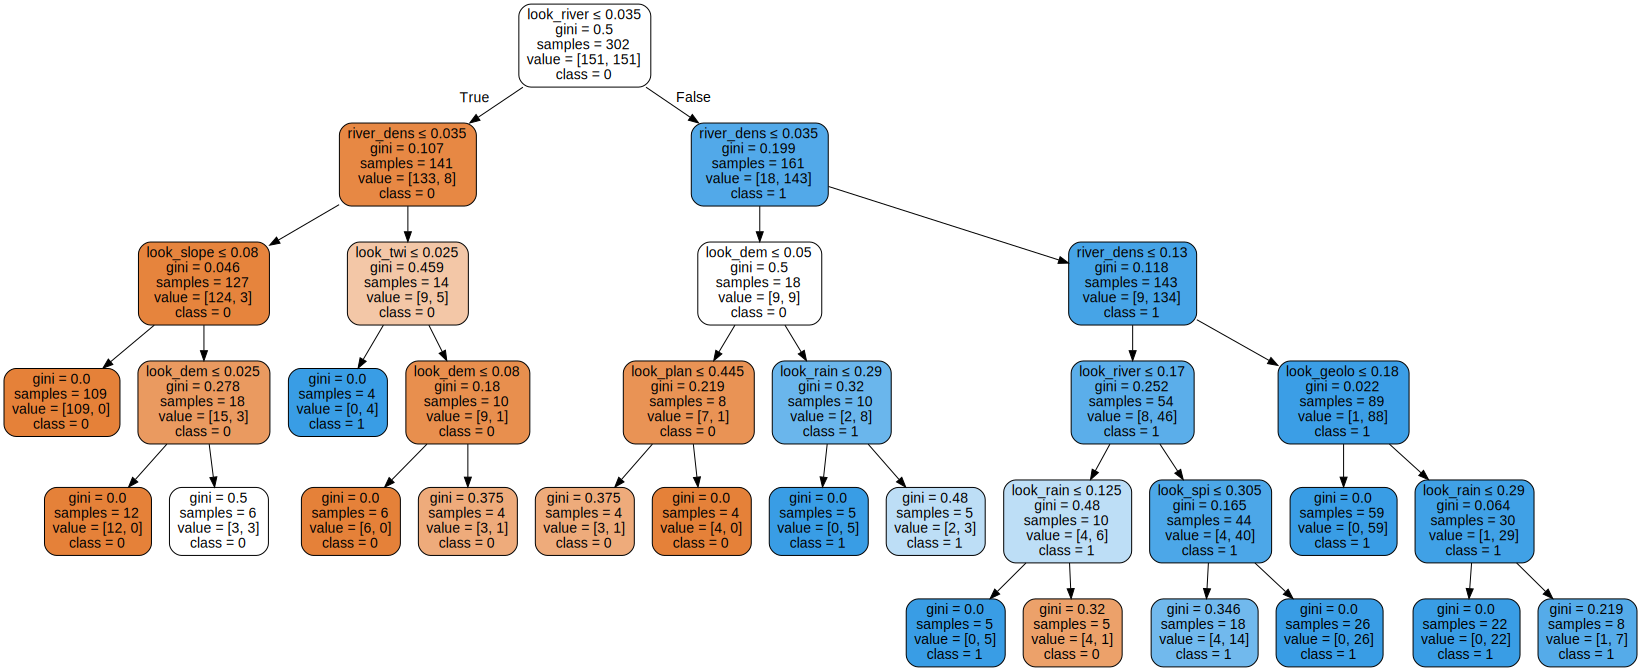

In [0]:

# Train Decision Tree Classifer
data2_Tree_model = data2_Tree_model.fit(data2_train_X,data2_train_y)
dot_data = tree.export_graphviz(data2_Tree_model, out_file=None,
                      feature_names=data2_train_X.columns,  
                      class_names=["0","1"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph  

Tree model for Data2:
accuracy: 0.906977 precision: 0.891304 f1_score: 0.911111


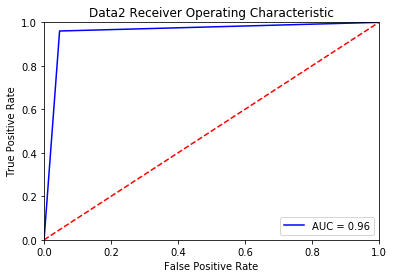

In [0]:
#Predict the response for test dataset
data2_val_pred = data2_Tree_model.predict(data2_val_X)

show_model_metrics('Tree','Data2',data2_val_pred,data2_val_y)